In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter

colors = sns.color_palette("hls", 8)

In [99]:
df_census = pd.read_csv('/Users/katialopes-gilbert/data-files/ncis-and-census-data/us-census-data-transformed.csv')

df_fbi = pd.read_csv('/Users/katialopes-gilbert/data-files/ncis-and-census-data/gun_data_clean.csv')

In [98]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   State                                               50 non-null     object 
 1   Population 2016                                     50 non-null     float64
 2   Population estimates base, April 1, 2010,  (V2016)  50 non-null     float64
 3   Population Percent Change 2010-2016                 50 non-null     float64
 4   Population 2010                                     50 non-null     float64
 5   Under 5                                             50 non-null     float64
 6   Under 18                                            50 non-null     float64
 7   65 and over                                         50 non-null     float64
 8   Percent Female                                      50 non-null     float64
 9   W

In [4]:
df_fbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11350 entries, 0 to 11349
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      11350 non-null  object 
 1   month-name                 11350 non-null  object 
 2   year                       11350 non-null  int64  
 3   state                      11350 non-null  object 
 4   handgun                    11350 non-null  float64
 5   long_gun                   11350 non-null  float64
 6   other                      5000 non-null   float64
 7   multiple                   11350 non-null  int64  
 8   private_sale_handgun       2500 non-null   float64
 9   private_sale_long_gun      2500 non-null   float64
 10  private_sale_other         2500 non-null   float64
 11  return_to_seller_handgun   2250 non-null   float64
 12  return_to_seller_long_gun  2500 non-null   float64
 13  return_to_seller_other     2050 non-null   flo

In [5]:
df_fbi.head()

,month,month-name,year,state,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,total_permits
0,2017-09-01,September,2017,Alabama,5734.0,6320.0,221.0,317,9.0,16.0,3.0,0.0,0.0,3.0,12623.0
1,2017-09-01,September,2017,Alaska,2320.0,2930.0,219.0,160,17.0,24.0,1.0,0.0,0.0,0.0,5671.0
2,2017-09-01,September,2017,Arizona,11063.0,7946.0,920.0,631,38.0,12.0,2.0,0.0,0.0,0.0,20612.0
3,2017-09-01,September,2017,Arkansas,4347.0,6063.0,165.0,366,13.0,23.0,0.0,0.0,2.0,1.0,10980.0
4,2017-09-01,September,2017,California,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,0.0,0.0,64730.0


I want to begin my analysis by visualizing the following:
1. Population growth by state from 2010 'Population, Cesnus, April 1, 2010' to 2016 'Population estimates, July 1, 2016,  (V2016)' using bar charts for each year for each state.
2. The distribution of race or ethnicity for each state. Use the following columns:
 14  Black or African American alone, percent, July 1, 2016,  (V2016),
 15  American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
 16  Asian alone, percent, July 1, 2016,  (V2016)
 17  Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)
 18  Two or More Races, percent, July 1, 2016,  (V2016)
 19  Hispanic or Latino, percent, July 1, 2016,  (V2016)
 20  White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016) 
3. Persons living in poverty in each state.
4. Total permits for each state adjusting for the population.

In [16]:
df_census.groupby('State')['Population, Census, April 1, 2010'].sum()

State
Alabama            4779736.0
Alaska              710231.0
Arizona            6392017.0
Arkansas           2915918.0
California        37253956.0
Colorado           5029196.0
Connecticut        3574097.0
Delaware            897934.0
Florida           18801310.0
Georgia            9687653.0
Hawaii             1360301.0
Idaho              1567582.0
Illinois          12830632.0
Indiana            6483802.0
Iowa               3046355.0
Kansas             2853118.0
Kentucky           4339367.0
Louisiana          4533372.0
Maine              1328361.0
Maryland           5773552.0
Massachusetts      6547629.0
Michigan           9883640.0
Minnesota          5303925.0
Mississippi        2967297.0
Missouri           5988927.0
Montana             989415.0
Nebraska           1826341.0
Nevada             2700551.0
New Hampshire      1316470.0
New Jersey         8791894.0
New Mexico         2059179.0
New York          19378102.0
North Carolina     9535483.0
North Dakota        672591.0
Ohio    

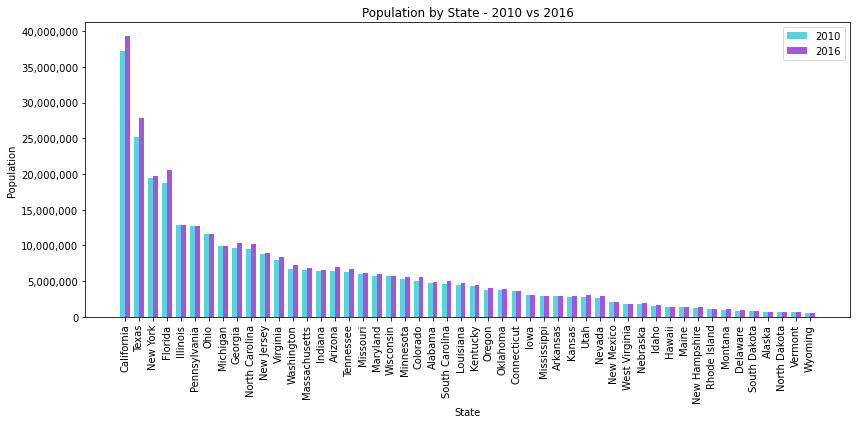

In [37]:
# population growth from 2010 to 2016

years = ['2010', '2016']
df_sorted = df_census.sort_values(by='Population, Census, April 1, 2010', ascending=False)
population_2010 = df_sorted['Population, Census, April 1, 2010'].values
population_2016 = df_sorted['Population estimates, July 1, 2016,  (V2016)'].values
states = df_sorted['State'].values

bar_width = 0.35

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
index = np.arange(len(states))

ax.bar(index, population_2010, bar_width, label='2010', color=colors[4])
ax.bar(index + bar_width, population_2016, bar_width, label='2016', color=colors[6])

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(states, rotation=90)
ax.set_xlabel('State')
ax.set_ylabel('Population')
ax.set_title('Population by State - 2010 vs 2016')
ax.legend()

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.tight_layout()
plt.show()

# Question - What states have the highest gun purchases per capita?

In order to answer this question, I will look at the census population in 2016 for each state. I will then take the total permits for each state and divide that by the population for each state and multiply the result by 100,000.

In [82]:
population_2016 = df_census[['State','Population estimates, July 1, 2016,  (V2016)']]
population_2016 = population_2016.rename(columns={'Population estimates, July 1, 2016,  (V2016)': 'Total Population'})
population_2016

,State,Total Population
0,Alabama,39250017.0
1,Alaska,27862596.0
2,Arizona,19745289.0
3,Arkansas,20612439.0
4,California,12801539.0
5,Colorado,12784227.0
6,Connecticut,11614373.0
7,Delaware,9928300.0
8,Florida,10310371.0
9,Georgia,10146788.0


In [94]:
df_fbi_2016 = df_fbi[df_fbi['year'] == 2016]

df_fbi_agg = df_fbi_2016.groupby('state').sum()

df_fbi_2016_aggregated = df_fbi_agg.reset_index()

df_fbi_2016_aggregated.drop(['year'], axis=1, inplace=True)

df_fbi_2016_aggregated

,state,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,total_permits
0,Alabama,153123.0,121963.0,6104.0,6545,72.0,65.0,4.0,3.0,2.0,0.0,287881.0
1,Alaska,37491.0,36887.0,2889.0,2316,39.0,66.0,1.0,2.0,3.0,0.0,79694.0
2,Arizona,166784.0,108988.0,13122.0,7908,76.0,56.0,11.0,11.0,11.0,1.0,296968.0
3,Arkansas,80244.0,82120.0,3059.0,4400,72.0,64.0,6.0,7.0,4.0,1.0,169977.0
4,California,560355.0,554550.0,211707.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1326612.0
5,Colorado,242502.0,180026.0,15890.0,14293,0.0,0.0,0.0,0.0,0.0,0.0,452711.0
6,Connecticut,122375.0,43813.0,2445.0,0,0.0,2.0,0.0,0.0,0.0,0.0,168635.0
7,Delaware,25574.0,21746.0,1268.0,1034,590.0,195.0,32.0,12.0,3.0,0.0,50454.0
8,Florida,662308.0,316232.0,42439.0,25142,369.0,143.0,4.0,2.0,0.0,0.0,1046639.0
9,Georgia,194800.0,128277.0,6474.0,7478,53.0,53.0,11.0,2.0,9.0,0.0,337157.0


In [95]:
# First, make sure both indexes are the same (the state names)
assert (df_fbi_2016_aggregated.index == population_2016.index).all()

# Then, create the new column
df_fbi_2016_aggregated['Permits per 100k'] = (df_fbi_2016_aggregated['total_permits'] / population_2016['Total Population']) * 100000


In [96]:
df_fbi_2016_aggregated

,state,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,total_permits,Permits per 100k
0,Alabama,153123.0,121963.0,6104.0,6545,72.0,65.0,4.0,3.0,2.0,0.0,287881.0,733.454459
1,Alaska,37491.0,36887.0,2889.0,2316,39.0,66.0,1.0,2.0,3.0,0.0,79694.0,286.025035
2,Arizona,166784.0,108988.0,13122.0,7908,76.0,56.0,11.0,11.0,11.0,1.0,296968.0,1503.994193
3,Arkansas,80244.0,82120.0,3059.0,4400,72.0,64.0,6.0,7.0,4.0,1.0,169977.0,824.633126
4,California,560355.0,554550.0,211707.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1326612.0,10362.910272
5,Colorado,242502.0,180026.0,15890.0,14293,0.0,0.0,0.0,0.0,0.0,0.0,452711.0,3541.168348
6,Connecticut,122375.0,43813.0,2445.0,0,0.0,2.0,0.0,0.0,0.0,0.0,168635.0,1451.950958
7,Delaware,25574.0,21746.0,1268.0,1034,590.0,195.0,32.0,12.0,3.0,0.0,50454.0,508.183677
8,Florida,662308.0,316232.0,42439.0,25142,369.0,143.0,4.0,2.0,0.0,0.0,1046639.0,10151.322392
9,Georgia,194800.0,128277.0,6474.0,7478,53.0,53.0,11.0,2.0,9.0,0.0,337157.0,3322.795352


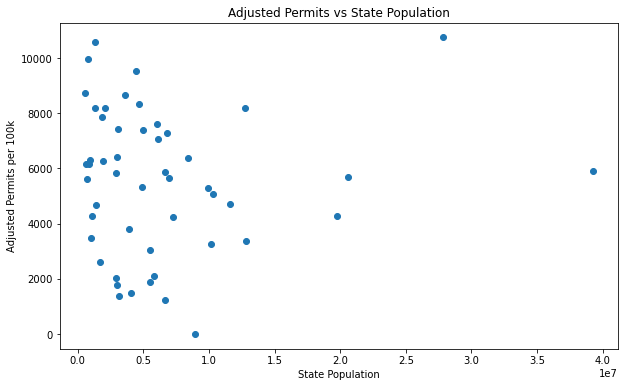

In [56]:
plt.figure(figsize=(10, 6))

# Assuming 'population_2016' is a list of population by state in the same order as states in df_fbi_agg
plt.scatter(population_2016, adjusted_permits)

plt.title('Adjusted Permits vs State Population')
plt.xlabel('State Population')
plt.ylabel('Adjusted Permits per 100k')

plt.scatter(population_2016, adjusted_permits)
plt.show()

In [ ]:
# Prepare data for visualization
df_census = df_census.rename(columns = {'Black or African American alone, percent, July 1, 2016,  (V2016)':'Black',
                          'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)':'American Indian',
                          'Asian alone, percent, July 1, 2016,  (V2016)':'Asian',
                          'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)':'Native Hawaiian',
                          'Two or More Races, percent, July 1, 2016,  (V2016)':'Two or More Races',
                          'Hispanic or Latino, percent, July 1, 2016,  (V2016)':'Hispanic',
                          'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)':'White'})

race_columns = ['Black', 'American Indian', 'Native Hawaiian', 'Hispanic', 'White', 'Two or More Races']
race_by_state = df_census.groupby('State')[race_columns].sum()

race_by_state.head()

In [ ]:
# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
index = np.arange(len(race_by_state))

bar_width = 0.5
opacity = 0.8

bottom = np.zeros(len(race_by_state))

for i, race in enumerate(race_columns):
    ax.bar(index, race_by_state[race], bar_width, alpha=opacity, label=race, color=colors[i], bottom=bottom)
    bottom += race_by_state[race]

ax.set_xticks(index)
ax.set_xticklabels(race_by_state.index, rotation=90)
ax.set_xlabel('State')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of Race/Ethnicity by State')
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Prepare data for visualization
poverty_data = df_census['Persons in poverty, percent'].sort_values(ascending=False).values

# Create bar chart for each state
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(states, poverty_data)
ax.set_xticklabels(states, rotation=90)
ax.set_xlabel('State')
ax.set_ylabel('Percentage of Persons in Poverty')
ax.set_title('Persons in Poverty by State')
plt.tight_layout()
plt.show()

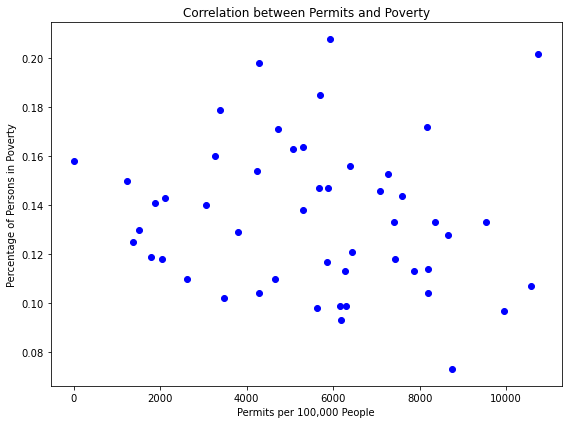

In [101]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(adjusted_permits, poverty_data, color='blue')
ax.set_xlabel('Permits per 100,000 People')
ax.set_ylabel('Percentage of Persons in Poverty')
ax.set_title('Correlation between Permits and Poverty')
plt.tight_layout()
plt.show()

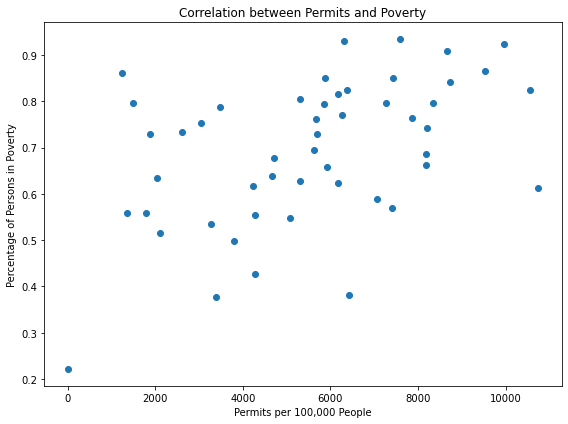

In [105]:
white_pop = df_census.groupby('State')['White'].sum()

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(adjusted_permits, white_pop)
ax.set_xlabel('Permits per 100,000 People')
ax.set_ylabel('Percentage of Population that is White')
ax.set_title('Correlation between Permits and Poverty')
plt.tight_layout()
plt.show()

In [107]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 65 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   State                                                                                   50 non-null     object 
 1   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     float64
 2   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     float64
 3   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     float64
 4   Population, Census, April 1, 2010                                                       50 non-null     float64
 5   Persons under 5 years, percent, July 1, 2016,  (V2016)                   

In [108]:
df_fbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11350 entries, 0 to 11349
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      11350 non-null  object 
 1   month-name                 11350 non-null  object 
 2   year                       11350 non-null  int64  
 3   state                      11350 non-null  object 
 4   handgun                    11350 non-null  float64
 5   long_gun                   11350 non-null  float64
 6   other                      5000 non-null   float64
 7   multiple                   11350 non-null  int64  
 8   private_sale_handgun       2500 non-null   float64
 9   private_sale_long_gun      2500 non-null   float64
 10  private_sale_other         2500 non-null   float64
 11  return_to_seller_handgun   2250 non-null   float64
 12  return_to_seller_long_gun  2500 non-null   float64
 13  return_to_seller_other     2050 non-null   flo